# Загрузка и проверка датасета


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine.csv


In [2]:
import pandas as pd

wine = pd.read_csv("Wine.csv")
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [5]:
print("Размерность данных:", wine.shape)
print("Типы переменных:")
print(wine.dtypes)
wine.dropna()
print("Размерность данных после удаления пропусков:", wine.shape)



Размерность данных: (178, 14)
Типы переменных:
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object
Размерность данных после удаления пропусков: (178, 14)


#Выбор переменных


От флавоноидов в вине зависит вкус и цвет вина, поэтому это определенно решающий параметр, к тому же в датасете разброс значений этого параметра достаточно большой.
Магний, содержащийся в вине, ионизирован и потому хорошо всасываются тонким кишечником. За этим параметром следят все ведущие производители вин, но мне кажется, что данные схожи по значению, нужно проверить.

In [12]:
print(wine['Magnesium'].mean())
print(wine['Magnesium'].max())
print(wine['Magnesium'].min())


99.74157303370787
162
70


Мне это нравится, я выбрал флавоноидов и магний.

In [19]:
x = wine.loc[:,['Flavanoids', 'Magnesium']]
y = wine['Customer_Segment']

#Выбор числа кластеров


In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

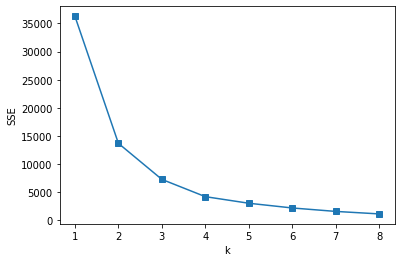

In [20]:
SSE = [] 

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [21]:
wine['Customer_Segment'].unique()

array([1, 2, 3])

В датасете 3 кластера, поэтому я тоже выберу 3. График показывает, что расстояние перестает значительно меняться после 3-4 кластеров.

# Разбиение на кластеры

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y = kmeans.labels_
y

array([0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0,
       0, 2], dtype=int32)

In [27]:
wine["my_cluster"]=y+1


In [28]:
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,my_cluster,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,3,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,3,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,3,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,3,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,3,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,1,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,1,1


In [35]:
x['my_cluster'] = y+1
x

,Flavanoids,Magnesium,my_cluster
0,3.06,127,1
1,2.76,100,3
2,3.24,101,3
3,3.49,113,3
4,2.69,118,1
...,...,...,...
173,0.61,95,3
174,0.75,102,3
175,0.69,120,1
176,0.68,120,1


# Визуализация

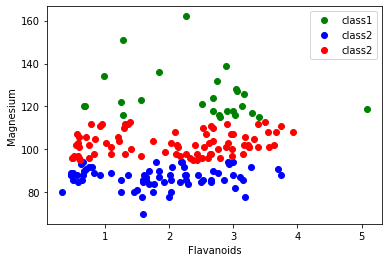

In [36]:

plt.plot(x[x['my_cluster']==1]['Flavanoids'], x[x['my_cluster']==1]['Magnesium'], 'go', label='class1')

plt.plot(x[x['my_cluster']==2]['Flavanoids'], x[x['my_cluster']==2]['Magnesium'], 'bo', label='class2')

plt.plot(x[x['my_cluster']==3]['Flavanoids'], x[x['my_cluster']==3]['Magnesium'], 'ro', label='class2')



plt.xlabel('Flavanoids')
plt.ylabel('Magnesium')
plt.legend(loc=0)
plt.show()